In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
#6. 채널정보
features_channel = [
    'IB문의건수_사용승인내역_R6M', 'IB문의건수_선결제_R6M',
    '당사멤버쉽_방문월수_R6M', '당사멤버쉽_방문횟수_B0M', '당사멤버쉽_방문횟수_R6M',
    '방문월수_PC_R6M', '방문월수_앱_R6M',
    '방문일수_PC_B0M', '방문일수_PC_R6M', '방문일수_앱_B0M', '방문일수_앱_R6M',
    '방문횟수_PC_B0M', '방문횟수_PC_R6M', '방문횟수_앱_B0M', '방문횟수_앱_R6M',
    '방문후경과월_PC_R6M', '방문후경과월_앱_R6M',
    '불만제기후경과월_R12M',
    '상담건수_B0M', '상담건수_R6M',
    '이용메뉴건수_ARS_B0M', '이용메뉴건수_IB_R6M',
    '인입일수_ARS_B0M', '인입월수_ARS_R6M',
    '인입일수_IB_B0M', '인입월수_IB_R6M', '인입횟수_IB_R6M',
    '인입후경과월_ARS', '인입후경과월_IB_R6M',
    '홈페이지_금융건수_R3M', '홈페이지_금융건수_R6M',
    '홈페이지_선결제건수_R3M', '홈페이지_선결제건수_R6M'
]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import os
# 1. 데이터 불러오기
df = pd.read_parquet("C:/Users/KING/Desktop/workspace/11_파이널프로젝트관련/팀 파일/data/통합_train_데이터.parquet")

# 1. 매핑 먼저 진행
visitday_mapping_1 = {
    "1회 이상": 1, "10회 이상": 10, "20회 이상": 20, "30회 이상": 30
}
visitday_mapping_2 = {
    "1회 이상": 1, "10회 이상": 10, "20회 이상": 20, "30회 이상": 30, "40회 이상": 40
}
visitday_mapping_3 = {
    "1회 이상": 1, "10회 이상": 10, "20회 이상": 20, "30회 이상": 30,
    "40회 이상": 40, "50회 이상": 50, "60회 이상": 60, "70회 이상": 70, "80회 이상": 80
}

df["방문일수_PC_R6M"] = df["방문일수_PC_R6M"].map(visitday_mapping_1)
df["방문횟수_PC_R6M"] = df["방문횟수_PC_R6M"].map(visitday_mapping_2)
df["방문횟수_앱_R6M"] = df["방문횟수_앱_R6M"].map(visitday_mapping_3)

# 2. 피처 및 타겟 분리
X = df[features_channel].copy()
y = df["Segment"]

# # 3. 범주형 인코딩
# cat_cols = X.select_dtypes(include='object').columns.tolist()
# for col in cat_cols:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col].astype(str))

In [4]:
# 최종적으로 object 타입이 남아 있는 컬럼 확인
print(X.select_dtypes(include='object').columns)

Index([], dtype='object')


In [5]:
# 4. 결측치 처리
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 5. 스케일링 (DataFrame 형태 유지)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 6. 라벨 인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 7. train-validation 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 8. XGBoost 모델 선언 (GPU 가속)
xgb_model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 9. 학습
xgb_model.fit(X_train, y_train)

# 10. 예측 및 평가
y_pred = xgb_model.predict(X_val)


from sklearn.metrics import f1_score
# F1-micro score 출력
f1_micro = f1_score(y_val, y_pred, average='micro')
print("📌 F1-micro score:", round(f1_micro, 4))

# 전체 분류 리포트 출력
print("\n📋 Classification Report:")
print(classification_report(y_val, y_pred, target_names=le_y.classes_))

📌 F1-micro score: 0.8034

📋 Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.01      0.01       194
           B       1.00      0.10      0.19        29
           C       0.49      0.04      0.07     25518
           D       0.44      0.03      0.05     69848
           E       0.81      1.00      0.89    384411

    accuracy                           0.80    480000
   macro avg       0.75      0.23      0.24    480000
weighted avg       0.74      0.80      0.73    480000



<Figure size 600x500 with 0 Axes>

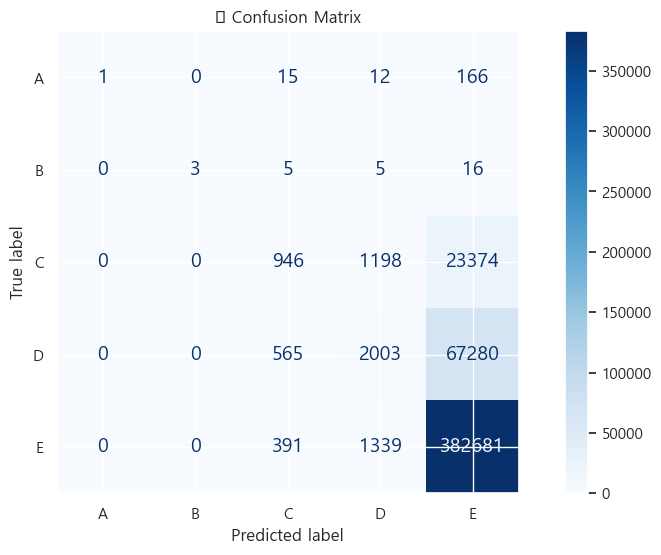

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 혼동 행렬 계산
cm = confusion_matrix(y_val, y_pred)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_y.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("📊 Confusion Matrix")
plt.show()

 99%|===================| 1492/1500 [00:45<00:00]        

🔍 SHAP beeswarm plot for Segment A


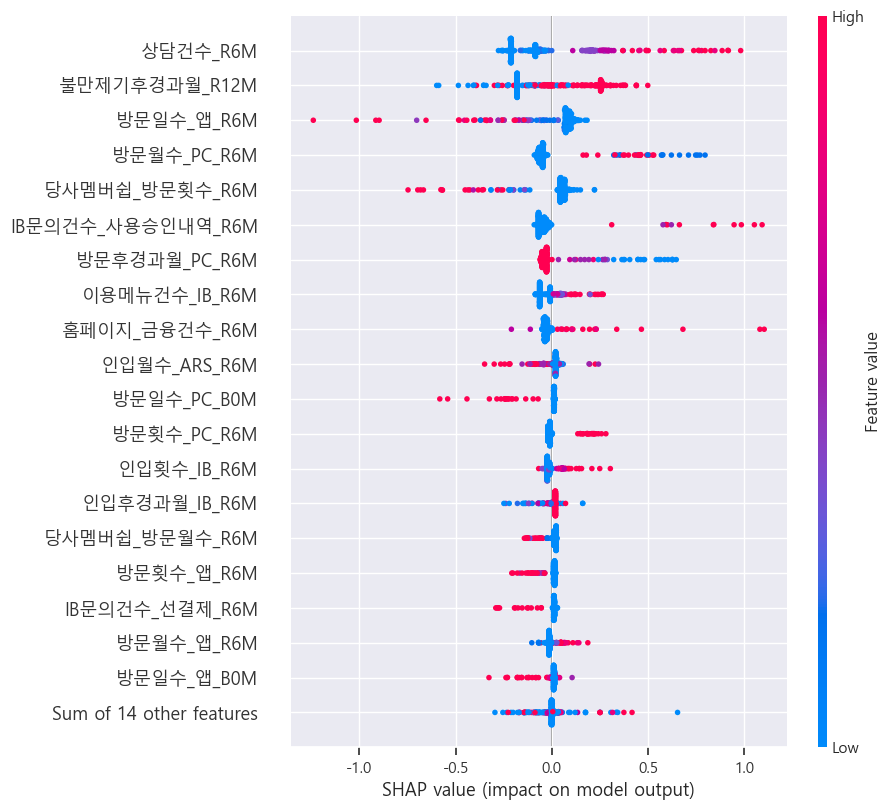

🔍 SHAP beeswarm plot for Segment B


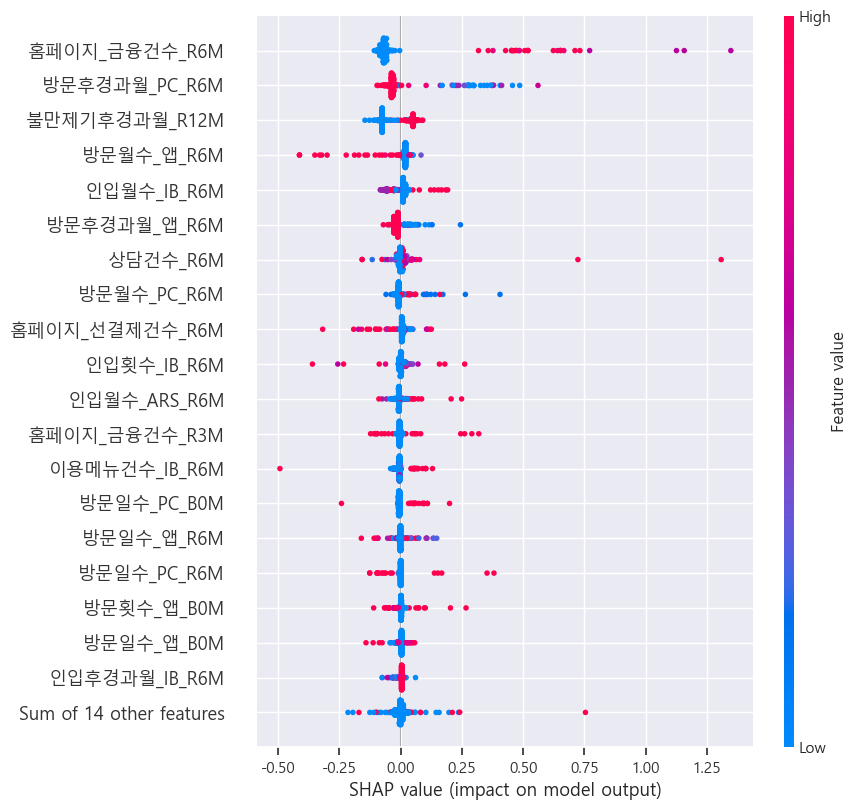

🔍 SHAP beeswarm plot for Segment C


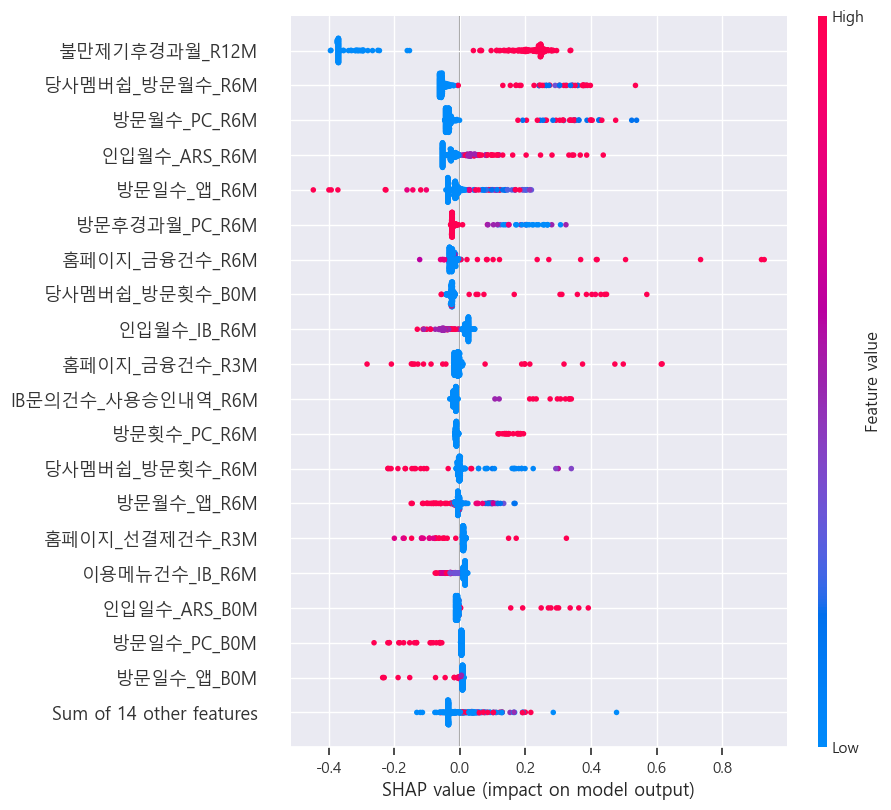

🔍 SHAP beeswarm plot for Segment D


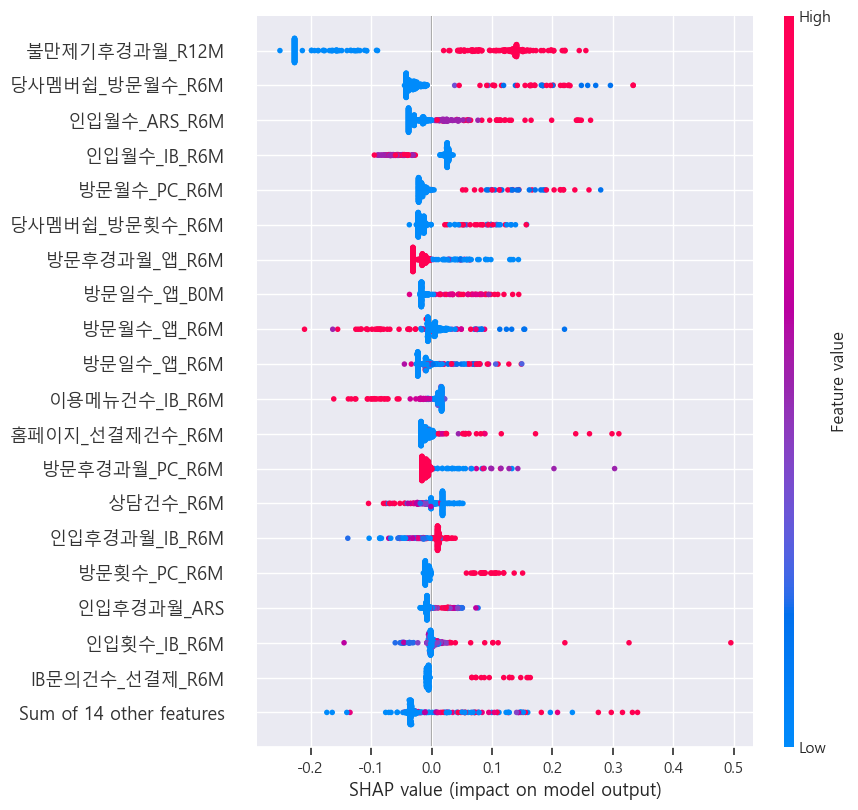

🔍 SHAP beeswarm plot for Segment E


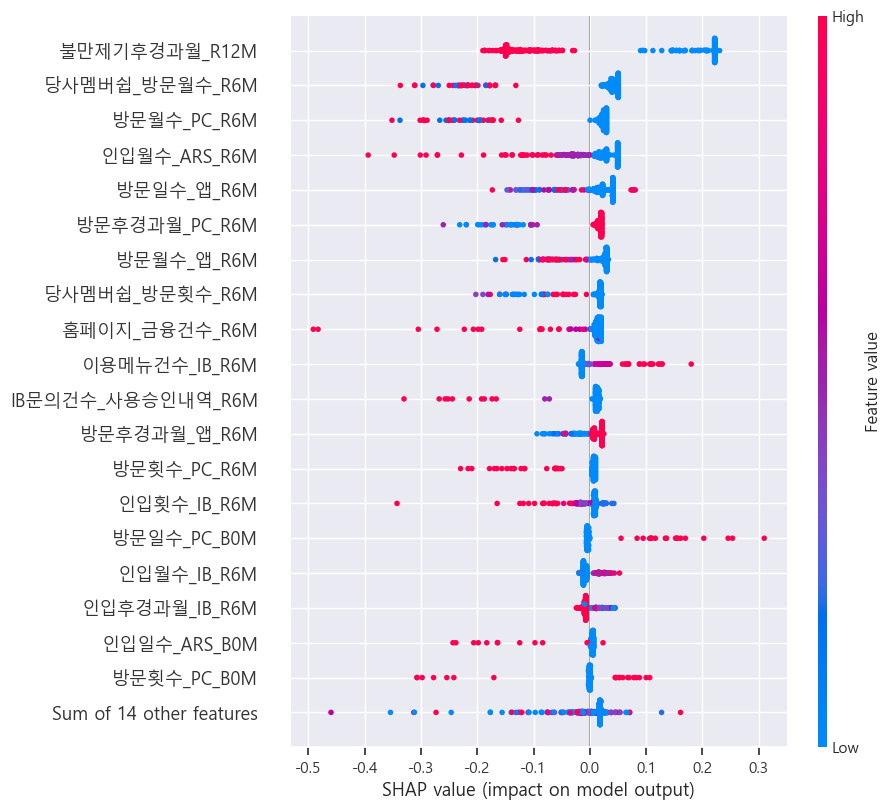

In [7]:
import shap  
import pandas as pd

# 1. 피처 이름 있는 DataFrame 준비
X_val_df = pd.DataFrame(X_val, columns=features_channel)

# 2. 전체 샘플에서 300개만 샘플링 (속도 문제 방지)
X_sample = X_val_df.sample(n=min(300, len(X_val_df)), random_state=42)

# 3. SHAP Explainer 생성 및 계산
explainer = shap.Explainer(xgb_model, X_sample)
shap_values = explainer(X_sample)

# 4. Segment 0~4 각각에 대해 beeswarm plot 출력
for i, class_label in enumerate(['A', 'B', 'C', 'D', 'E']):
    print(f"🔍 SHAP beeswarm plot for Segment {class_label}")
    shap.plots.beeswarm(shap_values[:, :, i], max_display=20)


<Figure size 1000x600 with 0 Axes>

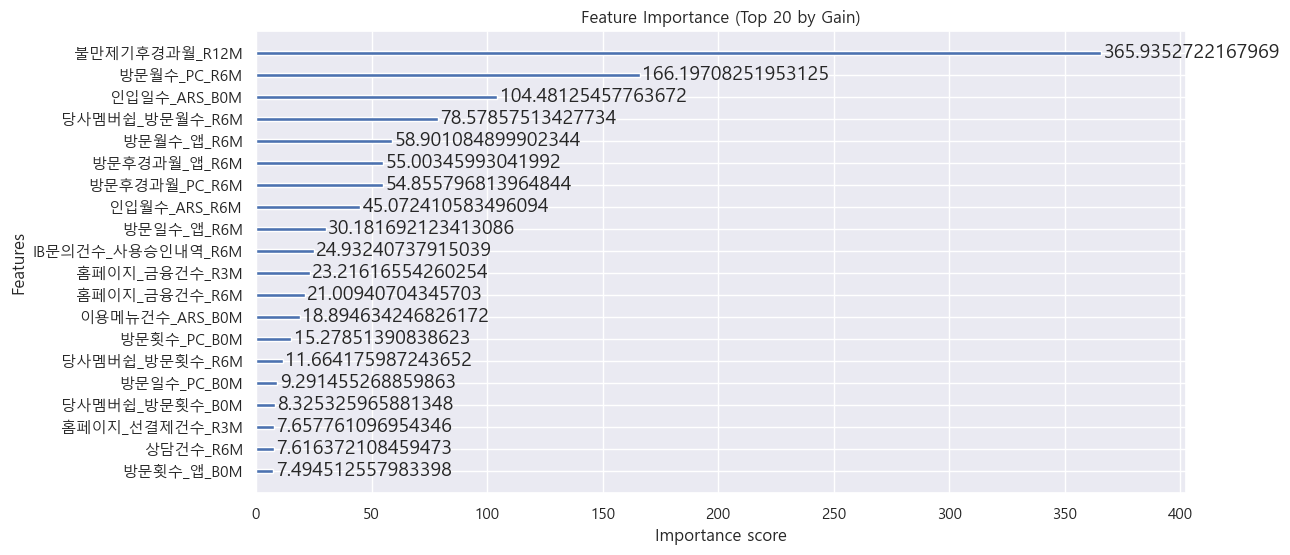

In [8]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title("Feature Importance (Top 20 by Gain)")
plt.show()
